In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as rmse
import warnings
import catboost
from catboost import Pool
from catboost import CatBoostRegressor
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv('train.csv', index_col = "id")
test = pd.read_csv('test.csv', index_col = "id")
submission = pd.read_csv('sample_submission.csv', index_col = "id")

In [6]:
train.drop('major', inplace = True, axis = 1)
test.drop('major', inplace = True, axis = 1)
train.dropna(inplace=True)

In [7]:
train['race_arab'] = pd.to_numeric(train['race_arab'], errors='coerce').fillna(0).astype('int')
train['race_asian'] = pd.to_numeric(train['race_asian'], errors='coerce').fillna(0).astype('int')
train['race_black'] = pd.to_numeric(train['race_black'], errors='coerce').fillna(0).astype('int')
train['race_white'] = pd.to_numeric(train['race_white'], errors='coerce').fillna(0).astype('int')

test['race_arab'] = pd.to_numeric(test['race_arab'], errors='coerce').fillna(0).astype('int')
test['race_asian'] = pd.to_numeric(test['race_asian'], errors='coerce').fillna(0).astype('int')
test['race_black'] = pd.to_numeric(test['race_black'], errors='coerce').fillna(0).astype('int')
test['race_white'] = pd.to_numeric(test['race_white'], errors='coerce').fillna(0).astype('int')

In [8]:
train["age"] = train["age"].where(train["age"] <= 100)
train["age"].fillna(train["age"].mean(), inplace = True)
train["age"] = train["age"].astype('int')

test["age"] = test["age"].where(test["age"] <= 100)
test["age"].fillna(test["age"].mean(), inplace = True)
test["age"] = test["age"].astype('int')

In [9]:
train["familysize"] = train["familysize"].where(train["familysize"] <= 10)
train["familysize"].fillna(train["familysize"].mean(), inplace = True)
train["familysize"] = train["familysize"].astype('int')

test["familysize"] = test["familysize"].where(test["familysize"] <= 10)
test["familysize"].fillna(test["familysize"].mean(), inplace = True)
test["familysize"] = test["familysize"].astype('int')

In [10]:
test["country"].fillna('US', inplace=True)

In [11]:
countries = []
for country in train["country"].unique():
    countries.append(country)
for country in test["country"].unique():
    countries.append(country)

In [12]:
le = LabelEncoder()
le.fit(countries)
train["country"] = le.transform(train["country"])
test["country"] = le.transform(test["country"])

In [13]:
train2 = train.drop(['country', 'introelapse', 'testelapse', 'testelapse', 'screenw', 'screenh'], axis=1)
test2 = test.drop(['country', 'introelapse', 'testelapse', 'testelapse', 'screenw', 'screenh'], axis=1)

In [14]:
target = train['nerdy']
X = train.drop(["nerdy"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=True, random_state=42, stratify=target)

In [15]:
target2 = train2['nerdy']
X2 = train2.drop(["nerdy"], axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, target2, test_size=0.2, shuffle=True, random_state=42, stratify=target2)

In [16]:
def train_model_df(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    print("RMSE for train set is: ", np.sqrt(rmse(y_train, pred_train)))
    pred_test = model.predict(X_test)
    print("RMSE for test set is: ", np.sqrt(rmse(y_test, pred_test)))

In [17]:
def train_model_df2(model, X_train2, X_test2, y_train2, y_test2):
    model.fit(X_train2, y_train2)
    pred_train = model.predict(X_train2)
    print("RMSE for train set 2 is: ", np.sqrt(rmse(y_train2, pred_train)))
    pred_test = model.predict(X_test2)
    print("RMSE for test set 2 is: ", np.sqrt(rmse(y_test2, pred_test)))

In [18]:
model1=LinearRegression(fit_intercept=True)
train_model_df(model1, X_train, X_test, y_train, y_test)
train_model_df2(model1, X_train2, X_test2, y_train2, y_test2)

RMSE for train set is:  1.292744396301155
RMSE for test set is:  1.3052992979330809
RMSE for train set 2 is:  1.2931946108894952
RMSE for test set 2 is:  1.3040938956894839


In [19]:
def scale(scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return([X_train_scaled, X_test_scaled])

In [20]:
scaler = MinMaxScaler()
X_train_scaled, X_test_scaled = scale(scaler, X_train, X_test)
X_train_scaled2, X_test_scaled2 = scale(scaler, X_train2, X_test2)

In [21]:
train_model_df(model1, X_train_scaled, X_test_scaled, y_train, y_test)
train_model_df2(model1, X_train_scaled2, X_test_scaled2, y_train2, y_test2)

RMSE for train set is:  1.292744396301155
RMSE for test set is:  1.3052992979330826
RMSE for train set 2 is:  1.2931946108894954
RMSE for test set 2 is:  1.3040938956900934


In [22]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scale(scaler, X_train, X_test)
X_train_scaled2, X_test_scaled2 = scale(scaler, X_train2, X_test2)

In [23]:
train_model_df(model1, X_train_scaled, X_test_scaled, y_train, y_test)
train_model_df2(model1, X_train_scaled2, X_test_scaled2, y_train2, y_test2)

RMSE for train set is:  1.292744396301155
RMSE for test set is:  1.3052992979330826
RMSE for train set 2 is:  1.2931946108894954
RMSE for test set 2 is:  1.3040938956900934


In [27]:
model2 = svm.SVR()
train_model_df(model2, X_train, X_test, y_train, y_test)
train_model_df2(model2, X_train2, X_test2, y_train2, y_test2)

RMSE for train set is:  1.6414736818647964
RMSE for test set is:  1.6451516242189517
RMSE for train set 2 is:  1.6422730889714967
RMSE for test set 2 is:  1.6449344326588435


In [28]:
train_model_df(model2, X_train_scaled, X_test_scaled, y_train, y_test)
train_model_df2(model2, X_train_scaled2, X_test_scaled2, y_train2, y_test2)

RMSE for train set is:  1.072046920009176
RMSE for test set is:  1.304353505902448
RMSE for train set 2 is:  1.0713954782452753
RMSE for test set 2 is:  1.2983993487374565


In [29]:
model3 = svm.LinearSVR(random_state=42)
train_model_df(model3, X_train_scaled, X_test_scaled, y_train, y_test)
train_model_df2(model3, X_train_scaled2, X_test_scaled2, y_train2, y_test2)

RMSE for train set is:  1.32740508959367
RMSE for test set is:  1.3427120848177432
RMSE for train set 2 is:  1.3289969122135525
RMSE for test set 2 is:  1.3418827241172366


In [24]:
model4 = XGBRegressor(
    random_state=42)
model4.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='rmse', early_stopping_rounds=100, verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
pred1 = model4.predict(X_train)
print (np.sqrt(rmse(y_train, pred1)))
pred2 = model4.predict(X_test)
print (np.sqrt(rmse(y_test, pred2)))

1.0525628298507266
1.2779388176841655


In [26]:
model4.fit(X_train2, y_train2, eval_set=[(X_train2, y_train2), (X_test2, y_test2)], eval_metric='rmse', early_stopping_rounds=100, verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
pred1 = model4.predict(X_train2)
print (np.sqrt(rmse(y_train2, pred1)))
pred2 = model4.predict(X_test2)
print (np.sqrt(rmse(y_test2, pred2)))

1.0718738643837813
1.2822305270970225


In [28]:
model4.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], eval_metric='rmse', early_stopping_rounds=100, verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
pred1 = model4.predict(X_train_scaled)
print (np.sqrt(rmse(y_train, pred1)))
pred2 = model4.predict(X_test_scaled)
print (np.sqrt(rmse(y_test, pred2)))

1.0525628298507266
1.277936594786975


In [30]:
model5 = XGBRegressor(random_state=42)

In [31]:
model5.fit(X_train_scaled2, y_train2, eval_set=[(X_train_scaled2, y_train2), (X_test_scaled2, y_test2)], eval_metric='rmse', early_stopping_rounds=100, verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
pred1 = model5.predict(X_train_scaled2)
print (np.sqrt(rmse(y_train2, pred1)))
pred2 = model5.predict(X_test_scaled2)
print (np.sqrt(rmse(y_test2, pred2)))

1.0718738643837813
1.282015696939041


In [3]:
model6 = CatBoostRegressor(random_state=42)

In [43]:
model6.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], early_stopping_rounds=100, verbose=0)

In [44]:
pred1 = model6.predict(X_train_scaled)
print (np.sqrt(rmse(y_train, pred1)))
pred2 = model6.predict(X_test_scaled)
print (np.sqrt(rmse(y_test, pred2)))

1.0532214984755233
1.2424043842611683


In [38]:
model7 = KNeighborsRegressor()
model7.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [39]:
pred1 = model7.predict(X_train_scaled)
print (np.sqrt(rmse(y_train, pred1)))
pred2 = model7.predict(X_test_scaled)
print (np.sqrt(rmse(y_test, pred2)))

1.1288047946281115
1.389992073711872


In [45]:
preds1 = model4.predict(test)
preds2 = model6.predict(test)

In [40]:
preds1-preds2

array([-4.33583191, -4.45907589, -3.5723658 , ..., -4.41737832,
       -3.54197069, -4.19081398])

In [46]:
submission["nerdy"] = preds2
submission.to_csv("model6.csv")

In [3]:
model4.get_booster().feature_names = X.columns.to_list()
plot_importance(model4.get_booster())

NameError: name 'X' is not defined

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

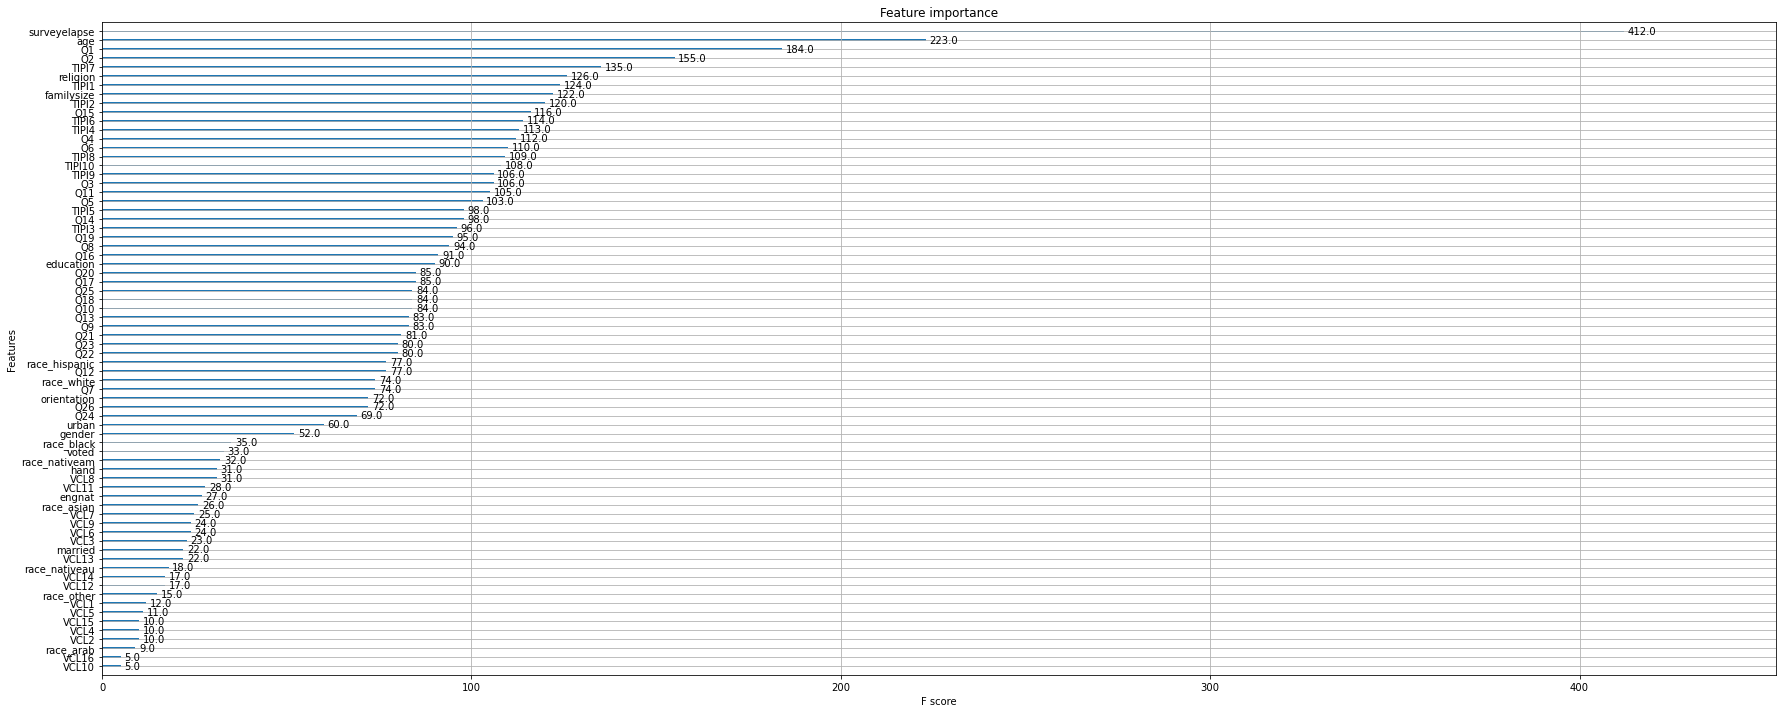

In [106]:
model5.get_booster().feature_names = X2.columns.to_list()
plot_importance(model5.get_booster())

In [53]:
importances = model6.get_feature_importance()
columns = X.columns.to_list()
for i in range(len(columns)):
    print ("column: ", columns[i], " importance: ", importances[i])

column:  Q1  importance:  4.262693246607727
column:  Q2  importance:  3.9738468557749016
column:  Q3  importance:  1.3319741283197828
column:  Q4  importance:  1.859007761105049
column:  Q5  importance:  1.9919092937896976
column:  Q6  importance:  7.257871609501457
column:  Q7  importance:  1.075818916788516
column:  Q8  importance:  1.3714187426061535
column:  Q9  importance:  0.5443467460526116
column:  Q10  importance:  0.44124942088670444
column:  Q11  importance:  2.80112481973552
column:  Q12  importance:  1.6984583147775443
column:  Q13  importance:  1.0714999445522264
column:  Q14  importance:  1.7928494319679547
column:  Q15  importance:  5.0393566633978875
column:  Q16  importance:  0.8828514743099096
column:  Q17  importance:  1.2582029693110095
column:  Q18  importance:  0.7861834630197249
column:  Q19  importance:  1.3514114348994968
column:  Q20  importance:  1.641949778509385
column:  Q21  importance:  0.38967984622750623
column:  Q22  importance:  0.523349676115248
col